# Coursework 1 - Huy Quang Pham

### <font color = 'orange'>Assignment 1 [part 1 of 2]</font>

For the below assignment questions, questions 1-3 are pen-and-paper exercises and do not require code. Questions 4-6 are coding exercises. For all questions, please **do make sure to show your workings** - i.e. how did you derive the result, by writing down your thinking, writing down the relevant equations or math derivations, or by showing the code that was used to generate the result that addresses the question.

1. Consider the following sales data: [3, 16, 20, 4, 2, 5, 10, 9, 13, 7, 14, 8]. Apply the following binning techniques on the data, assuming 3 bins in each case:
  1. Equal-frequency binning
  2. Smoothing by bin boundaries
  
  [0.5 marks out of 5]
  
  
  
2. Use the below methods to normalize the following data: [10, 5, 25, 50, 35]:
  1. min-max normalization with min=0 and max=1.
  2. z-score normalization

  [0.5 marks out of 5]


3. Students at two universities, University A and University B, have been provided with feedback forms on student satisfaction, with the below responses recorded. Is student satisfaction correlated with a specific university? Use a chi-square test to find out, assuming a significance level of 0.001 and a corresponding chi-square significance value of 10.828. [1 mark out of 5]

|Rating/University |University A |University B |
|--------------- |---------- |---------- |
|Satisfied |71 |129 |
|Dissatisfied |37 |73 |


4. Load the CSV file country-income.csv which includes both numerical and categorical attributes. Perform data cleaning in order to replace any NaN values with the mean of the value for a given field. Then replace any categorical labels with numerical labels. Display the resulting dataset. You can use the sklearn.impute and sklearn.preprocessing packages to asssist you. [1 mark out of 5]


5. Load the CSV file shoesize.csv, which includes measurements of shoe size and height (in inches) for 408 subjects, both female and male. Plot the scatterplots of shoe size versus height for female and male subjects separately. Compute the Pearson's correlation coefficient of shoe size versus height for female and male subjects separately. What can be inferred by the scatterplots and computed correlation coefficients? You can implement your own formulation of the correlation coefficient or use the scipy.stats package to assist you. [1 mark out of 5]


6. Using the pre-processed breast cancer dataset from subsection 1.1 of this notebook (which replaced any missing values with their median), perform Principal Component Analysis with 2 components. Compute the explained variance ratio for each component, and plot the scatterplot of all samples along the two principal components, color-coded according to the "Class" column (this column should not be used in the PCA analysis). Ensure that your data is normalized prior to performing PCA. What insights can you obtain by the explained variance ratio of each component, and by viewing the scatterplot of the principal components? [1 mark out of 5]


Importing a few libraries to be used:

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns

#### Question 1: Binning

1. Equal-frequency binning requires:
    1. sorting the data, which:
    The given sales data can be sorted to a new list: [2, 3, 4, 5, 7, 8, 9, 10, 13, 14, 16, 20]
    1. partitioning the ordered data into bins with roughly the same number of data objects:
    There are 12 objects and 3 bins, therefore each bin will consist of 4 data objects
    
    $\Rightarrow$ The current data will be split into the following bins: [2, 3, 4, 5]; [7, 8, 9, 10]; [13, 14, 16, 20]
 
2. Smoothing by bin boundaries requires using equal-frequency bins, using the minimum and maximum value in each bin as 2 boundaries and mapping each data object in the bin to the closest boundaries.
    
    $\Rightarrow$ The boundaries for the bins are [2, 5] for [2, 3, 4, 5]; [7,10] for [7, 8, 9, 10]; [13,20] for [13, 14, 16, 20]
    
    $\Rightarrow$ Bins with replaced values are: [2, 2, 5, 5], [7, 7, 10, 10], [13, 13, 13, 20] 

#### Question 2: Normalisation of data (sorted): [5, 10, 25, 35, 50]:
1. min-max normalization with min=0 and max=1. As new normalized values can be calculated with the following formula:

$$ new\_value = \frac{value - min_a}{max_a - min_a}(new\_max_a-new\_min_a) + new\_min_a  $$
$$\\\Rightarrow new\_value = \frac{value - 5}{50 - 5}  $$
$\\\Rightarrow$ the value for each data object in the sorted list above will be: [0, 0.111, 0.444, 0.666, 1] (rounded up to 3 digits)

2. z-score normalization. As new normalized values can be calculated with the following formula:
$$ new\_value = \frac{value - \mu_a}{\sigma_a}$$
    1. $ \mu_a = (5+10+25+35+50)/5 = 125/5 = 25$
    1. $ \sigma_a = \sqrt{\frac{\sum_{i = 1}^n (x_i - \mu_a)^2}{N}} = \sqrt{\frac{\sum_{i = 1}^n (x_i - 25)^2}{5}} = \sqrt{\frac{(5 - 25)^2+(10 - 25)^2+(35 - 25)^2+(50-25^2)}{5}} = 16.431 $
    
$$\\\Rightarrow new\_value = \frac{value - 25}{16.431} $$ 

$\Rightarrow $ the value for each data object in the sorted list above will be: [-1.217, -0.913, 0.0, 0.609, 1.522] (rounded up to 3 digits)

#### Question 3: Chi-squared test

The null hypothesis: The 2 Variables Rating and University is independent.

In order to test this hypothesis, the chi-squared statistics need to be calculated according to the following formula:

$$\varkappa^2 = \sum _{i = 1}^c \sum _{j = 1}^r \frac{(observed_{ij} - expected_{ij})^2}{expected_{ij}}$$

This requires the expected frequency of every distinct value. For this the total frequency of each row and column will be calculated first.

|Rating/University |University A |University B |Total |
|--------------- |---------- |---------- |---------- |
|Satisfied |71 |129 | 200 |
|Dissatisfied |37 |73 | 110 |
|Total |108 |202 | 310 |

From these totals the expected frequency of each distinct value of Rating and University can be calculated

|Rating/University |University A |University B |Total |
|--------------- |---------- |---------- |---------- |
|Satisfied |71 (69.677) |129 (130.323)| 200 |
|Dissatisfied |37 (38.323) |73 (71.677)| 110 |
|Total |108 |202 | 310 |

Chi squared value: $ \varkappa^2 = \frac{(71-69.677)^2}{69.677} +\frac{(37-38.323)^2}{38.323} + \frac{(129-130.323)^2}{130.323} + \frac{(73-71.676)^2}{71.676} = 0.109 $ 

Given the value $\varkappa^2$ needed to reject the hypothesis at the 0.001 significance level is 10.828, the current Chi-squared value means we fail to reject the null hypothesis, thus suggesting the 2 variables are independent.  

#### Question 4: Data Quality

This data will be looked at with an overview.

In [2]:
q4 = pd.read_csv('country-income.csv')

print('Number of instances = %d' % (q4.shape[0]))
print('Number of attributes = %d' % (q4.shape[1]))
q4


Number of instances = 10
Number of attributes = 4


,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


This table only has 10 observations so it can be printed out fully. A closer look to see which column has missing data:

In [3]:
print('Number of missing values:')
for col in q4.columns:
    print(f'\t{col}: {q4[col].isna().sum()})')

Number of missing values:
	Region: 0)
	Age: 1)
	Income: 1)
	Online Shopper: 0)


As shown, columns Age and Income has missing values. These data points will then be replaced by the mean of the corresponding column.

In [4]:
q4['Age'] = q4['Age'].fillna(q4['Age'].mean())
q4['Income'] = q4['Income'].fillna(q4['Income'].mean())

Then, the 2 categorical variables are mapped to numeric variables, in which for Region India is 1, Brazil is 2 and USA is 3; while for online shopping, No is 0 and Yes is 1.

In [5]:
region = q4['Region'].unique().tolist()
onl_shopper = q4['Online Shopper'].unique().tolist()
region_map = dict(zip(region, range(1,4)))    
onl_shopper_map = dict(zip(onl_shopper, range(2)))    
q4['Region'] =q4['Region'].map(region_map)
q4['Online Shopper'] =q4['Online Shopper'].map(onl_shopper_map)
q4

,Region,Age,Income,Online Shopper
0,1,49.000000,86400.000000,0
1,2,32.000000,57600.000000,1
2,3,35.000000,64800.000000,0
3,2,43.000000,73200.000000,0
4,3,45.000000,76533.333333,1
5,1,40.000000,69600.000000,1
6,2,43.777778,62400.000000,0
7,1,53.000000,94800.000000,1
8,3,55.000000,99600.000000,0
9,1,42.000000,80400.000000,1


#### Question 5: Correlation

In [6]:
q5 = pd.read_csv('shoesize.csv')
q5.shape

(408, 4)

Drawing the scatterplot:

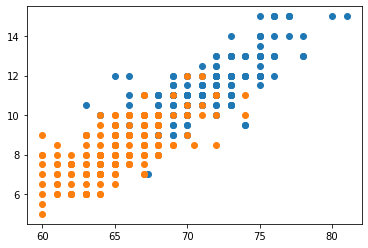

In [7]:
import matplotlib.pyplot as plt

#day one, the age and speed of 13 cars:
height_male = q5.loc[q5.Gender == 'M', 'Height']
size_male = q5.loc[q5.Gender == 'M', 'Size']
plt.scatter(height_male, size_male)

#day two, the age and speed of 15 cars:
height_female = q5.loc[q5.Gender == 'F', 'Height']
size_female = q5.loc[q5.Gender == 'F', 'Size']
plt.scatter(height_female, size_female)

plt.show()

The scatterplot implies a positive relationship between Shoe size and height for both Male and Female. The Pearson coefficient is then calculated to confirm the 2 variables' correlation.

In [8]:


male_coef, male_p = stats.pearsonr(height_male, size_male)
print(f"Pearson coefficient for Male's shoe size and height: {male_coef}, p-value: {round(male_p, 10)}")
female_coef, female_p = stats.pearsonr(height_female, size_female)
print(f"Pearson coefficient for Female's shoe size and height: {female_coef}, p-value: {round(female_p, 10)}")

Pearson coefficient for Male's shoe size and height: 0.7677093547300966, p-value: 0.0
Pearson coefficient for Female's shoe size and height: 0.7078119417143969, p-value: 0.0


With coefficients of 0.77 and 0.71 and low p-value, this suggests a significant positive correlation between shoe size and height for both Females and Males. 

#### Question 6: Principal Component Analysis

We can inherit the code to preprocess this data from the lab:

In [9]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)

#replace missing values which was set to "?" to NaN
data = data.replace('?',np.NaN)
#replace NaN with median
print('Before replacing missing values:')
print(data[20:25]['Bare Nuclei'])

data = data.fillna(data.median())

print('\nAfter replacing missing values:')
print(data[20:25]['Bare Nuclei'])



Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20     10
21      7
22      1
23    1.0
24      1
Name: Bare Nuclei, dtype: object


Currently Bare Nuclei is being set to 'Object' rather than 'int64'. Therefore this should be reset before conducting the normalization and PCA.

In [10]:
print("Before changing: \n", data.dtypes)
data = data.astype({'Bare Nuclei' : 'int64'})
print("After changing: \n", data.dtypes)

Before changing: 
 Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object
After changing: 
 Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


After that, normalization using z-score is carried out.

In [11]:
from scipy.stats import zscore

data_normalized = data.loc[:, data.columns != 'Class'].apply(zscore)

data_normalized.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912


Then, data is transformed using PCA from multiple columns into 2 dimensions, and appended with the column Class:

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

projected = pca.fit_transform(data_normalized)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(0,len(data_normalized)))
projected['Class'] = data['Class']
projected

,pc1,pc2,Class
0,-1.456220,-0.110210,2
1,1.466279,-0.544894,2
2,-1.579311,-0.074854,2
3,1.505247,-0.558853,2
4,-1.330551,-0.089657,2
...,...,...,...
694,-1.711249,0.188019,2
695,-2.063036,0.234224,2
696,3.825359,-0.180466,4
697,2.269482,-1.113435,4


Then a scatter plot can be drawn to see the projected values and get a feel of how well the 2 classes are differentiated using these 2 new components.

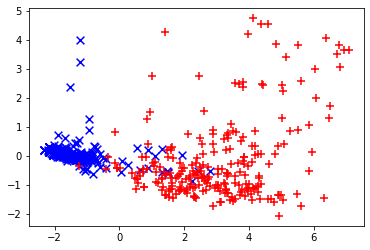

In [13]:

colours = {2:'b', 4:'r'}
markerTypes = {2:'x', 4:'+'}

for c in markerTypes:
    d = projected[projected['Class']==c]
    plt.scatter(d['pc1'],d['pc2'],c=colours[c],s=60,marker=markerTypes[c])

We can see that the 2 classes are quite separable, hence the new components retains a considerable amount of variance. This can be further quantified if we look at the explained variance ratio:

In [14]:
var_rat = list(pca.explained_variance_ratio_)
print('Variance of each component:', var_rat)
print('Total variance explained by both components:', sum(var_rat))

Variance of each component: [0.6544570379762199, 0.08608589755529694]
Total variance explained by both components: 0.7405429355315168


74% of the original variance is retained by the new components. Component 1 explains most of this retained variance.

### <font color = 'orange'>Assignment 2 [part 2 of 2]</font>

1. In Section 1, what kind of relationship can be inferred from summary statistics regarding ``ACT composite score`` and ``SAT total score``? Which visualisations make this relationship apparent? [0.5 marks out of 5]

2. Based on the box plots presented in Section 1, what is the relationship between ``parental level of education`` and ``parental income``? Using table visualisation, find and show the entire rows that correspond to the outliers regarding ``parental income`` whose parents have a master's degree. [0.5 marks out of 5]

3. Using an example, explain the importance of scaling features so that their magnitudes are comparable when computing distances. [0.5 marks out of 5]

4. In Section 1, the distance matrix visualisation is not very informative. However, it is still possible to infer that the average distance between students whose parents only have some high school education and students whose parents have a master's degree is larger than the average distance between students whose parents only have some high school education. Explain how this inference is possible from the visualisation. [0.5 marks out of 5]

5. In Section 2, increase the number of evenly spaced numbers from 10 to 100 for both axes and observe the corresponding heat map created through nearest neighbour interpolation. Read about this interpolation method and explain what you observed. [0.5 marks out of 5]

6. The function ``load_wine`` from ``sklearn.datasets`` can be used to load the *wine dataset* into a ``DataFrame`` by using the commands ``data = load_wine()``, ``df = pd.DataFrame(data.data, columns=data.feature_names)``, and ``df['target'] = pd.Series(data.target)``. 

    6.1. Load the wine dataset. Compute the frequency of each value of the 'target' feature.  [0.5 marks out of 5]
    
    6.2. Compute univariate and multivariate summaries for all numerical features (except from the target feature). Group observations by the target feature and compute the corresponding **median** for each numerical feature. [0.5 marks out of 5]
    
    6.3. Group observations by the target feature and create one box plot of ``alcohol`` for each group. [0.5 marks out of 5]
    
    6.4. Create a scatter plot for the pair of **distinct** numerical features with the highest correlation.  [0.5 marks out of 5]
    
    6.5. Exclude the target feature, standardize the remaining numerical features, and display a projection obtained by multidimensional scaling. Color the points by the target feature. [0.5 marks out of 5]

#### Question 1. Relationship between ``ACT composite score`` and ``SAT total score``

Inheriting pre-processing features from the lab:

In [15]:

grad_rt = pd.read_csv('graduation_rate.csv')

print('\nParental levels of education:')
print(grad_rt['parental level of education'].unique())

education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

grad_rt['parental level of education'] = pd.Categorical(grad_rt['parental level of education'],
                                                   ordered=True,
                                                   categories=education_order)




Parental levels of education:
["master's degree" 'some college' 'some high school' "bachelor's degree"
 "associate's degree" 'high school']


Visualizing the relationship between ``ACT composite score`` and ``SAT total score``:

<AxesSubplot:xlabel='SAT total score', ylabel='ACT composite score'>

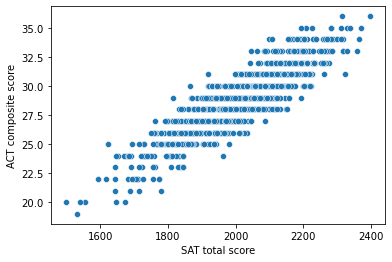

In [16]:
sns.scatterplot(y='ACT composite score', x='SAT total score', data=grad_rt)

It is clear that there is a strong positive correlation between the 2 variables.

#### Question 2: Parental income and outlier

[Text(0, 0, 'some high\nschool'),
 Text(1, 0, 'high\nschool'),
 Text(2, 0, 'some\ncollege'),
 Text(3, 0, "associate'\ns degree"),
 Text(4, 0, "bachelor's\ndegree"),
 Text(5, 0, "master's\ndegree")]

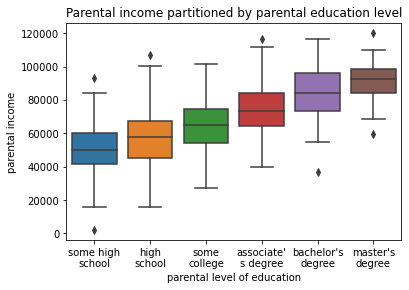

In [17]:
ax = sns.boxplot( y='parental income', x='parental level of education', data=grad_rt)
plt.title('Parental income partitioned by parental education level')

#wrap labels so that it shows clear x labels
import textwrap
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])


The outliers are the ones falling outside of 1.5 times the IQR range below the 1st Quartile or over the 3rd Quartile. Only 2 observations are outliers among those parents who have a Master's degree.

In [18]:
#filtering only those with master's degree
grad_rt_master = grad_rt.loc[grad_rt['parental level of education']=="master's degree"]

#calculating 1st and 3rd quartile and IQR
q1 = grad_rt_master['parental income'].quantile(0.25)
q3 = grad_rt_master['parental income'].quantile(0.75)
IQR = q3 - q1


grad_rt_master.dtypes
#filtering only outliers
grad_rt_master.loc[(grad_rt_master['parental income']<(q1-1.5*IQR)) |
                   (grad_rt_master['parental income']>(q3+1.5*IQR))]

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
411,31,2108,master's degree,120391,4.0,3.6,4
420,28,2097,master's degree,59724,3.9,3.2,4


#### Question 3: Feature scaling

Features not having a common unit of measurement need to be scaled accordingly to avoid a skew toward a particular feature. This can be seen when computing distances with variables such as ``parental income`` and ACT composite score, whereby the distance will skew toward ``parental income``.

#### Question 4: Distance Matrix

Distance Matrix code is inherited from the lab.

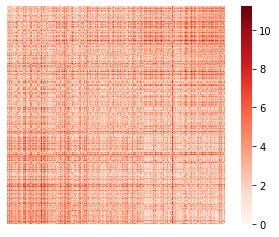

In [19]:
from sklearn.preprocessing import StandardScaler

grad_rt_sorted = grad_rt.sort_values(by='parental level of education', ascending=True)
parental_education_sorted = grad_rt_sorted['parental level of education']

X = grad_rt_sorted.drop(columns='parental level of education').to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

from scipy.spatial import distance

dist = distance.squareform(distance.pdist(X))
sns.heatmap(dist, square=True, xticklabels=False, yticklabels=False,
                cmap='Reds')
    
plt.show()

As can be seen in the heatmap above, we can see that the area representing the distance between students whose parents have some high school degree and students whose parents have a master's degree (the top right and bottom left corner) is darker in colour, which signifies a larger distance than that among students whose parents only have some high school degree (top left corner).

#### Question 5: Nearest neighbour interpolation

First, 2 heatmaps will be drawn, one with 10 evenly spaced numbers, and one with 100 evenly spaced numbers. 

,x,y,"z = f(x,y)"
0,-1.000000,-1.0,2.000000
1,-0.777778,-1.0,1.604938
2,-0.555556,-1.0,1.308642
3,-0.333333,-1.0,1.111111
4,-0.111111,-1.0,1.012346
...,...,...,...
95,0.111111,1.0,1.012346
96,0.333333,1.0,1.111111
97,0.555556,1.0,1.308642
98,0.777778,1.0,1.604938


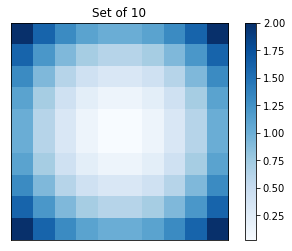

In [20]:
x_range = np.linspace(-1, 1, 10)
y_range = np.linspace(-1, 1, 10)

# meshgrid: X[i, j] == x_range[j] and Y[i, j] == y_range[i]
X, Y = np.meshgrid(x_range, y_range)

# Z[i, j] == f(x_range[j], y_range[i])
Z = X**2 + Y**2

# Dataset representation
df = pd.DataFrame({'x': X.reshape(-1), 'y': Y.reshape(-1), 'z = f(x,y)': Z.reshape(-1)})
display(df)

# Interpolation: point (x, y) is colored according to the value z of the nearest point in the dataset
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='nearest')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])
plt.title("Set of 10")

plt.show()

,x,y,"z = f(x,y)"
0,-1.000000,-1.0,2.000000
1,-0.979798,-1.0,1.960004
2,-0.959596,-1.0,1.920824
3,-0.939394,-1.0,1.882461
4,-0.919192,-1.0,1.844914
...,...,...,...
9995,0.919192,1.0,1.844914
9996,0.939394,1.0,1.882461
9997,0.959596,1.0,1.920824
9998,0.979798,1.0,1.960004


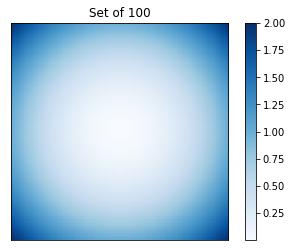

In [21]:
x_range = np.linspace(-1, 1, 100)
y_range = np.linspace(-1, 1, 100)

# meshgrid: X[i, j] == x_range[j] and Y[i, j] == y_range[i]
X, Y = np.meshgrid(x_range, y_range)

# Z[i, j] == f(x_range[j], y_range[i])
Z = X**2 + Y**2

# Dataset representation
df = pd.DataFrame({'x': X.reshape(-1), 'y': Y.reshape(-1), 'z = f(x,y)': Z.reshape(-1)})
display(df)

# Interpolation: point (x, y) is colored according to the value z of the nearest point in the dataset
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='nearest')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])
plt.title("Set of 100")

plt.show()

When increasing to set of 100, the heatmap has a much more detailed gradient, as now the number of values of z has now increased to 10000 compared to 100. This basically behaves like a pixel on the heatmap, making the 'image' much more detailed and higher quality.

#### Question 6: Load wine

In [22]:
from sklearn import datasets

data = datasets.load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
print(df.head())
print(df.shape)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

##### 6.1:  Frequency of target variable

In [23]:
df.loc[:, ['target', 'alcohol']].groupby('target').count()

,alcohol
target,
0,59
1,71
2,48


##### 6.2: Univariate and Multivariate summary

In [24]:
#get a new dataframe with no target variable
df_indep = df.loc[:, df.columns != 'target']

Univariate: Descriptive Statistics:

In [25]:
df_indep.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Multivariate: Correlation Matrix

<AxesSubplot:>

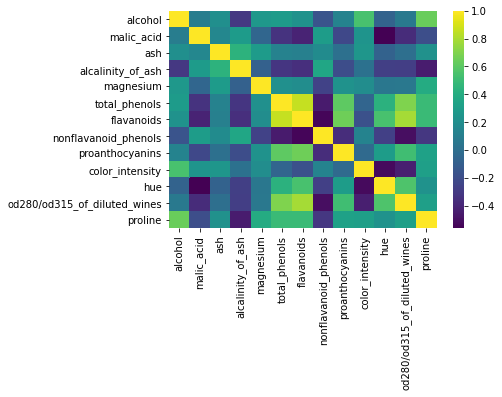

In [26]:
sns.heatmap(df_indep.corr(), cmap = 'viridis')

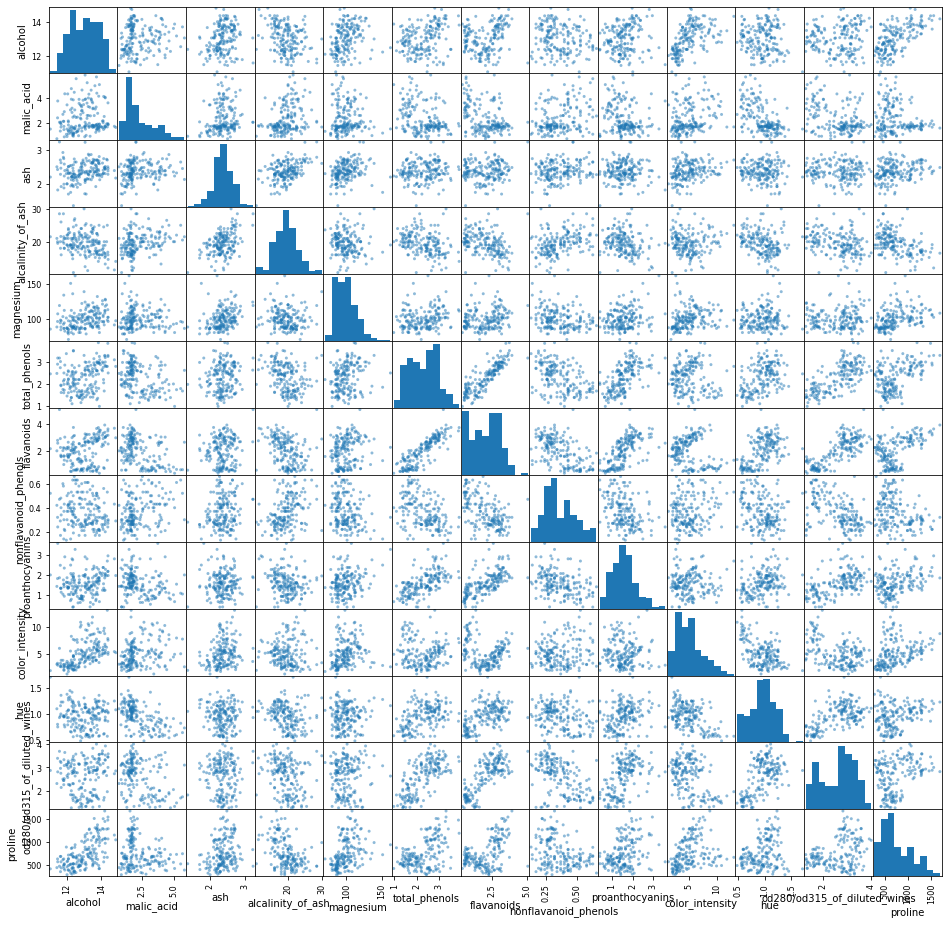

In [27]:
_a = pd.plotting.scatter_matrix(df_indep, figsize=(16,16))

Median of each feature grouped by target values:

In [28]:
df.groupby('target').median()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.750,1.770,2.44,16.8,104.0,2.800,2.980,0.29,1.870,5.40,1.070,3.17,1095.0
1,12.290,1.610,2.24,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.83,495.0
2,13.165,3.265,2.38,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.66,627.5


##### 6.3 Boxplot

Text(0.5, 1.0, 'Alcohol box plot by target')

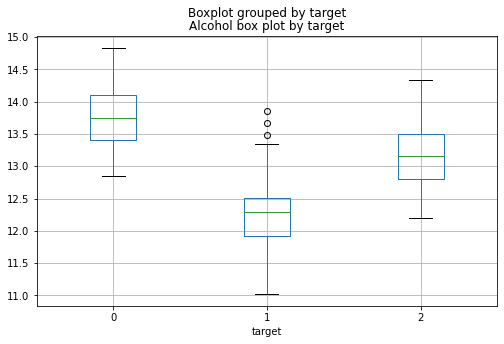

In [29]:
fig, (a1) = plt.subplots(1,1, figsize=(8,5))

df.boxplot(column='alcohol', by='target', ax=a1)

plt.title('Alcohol box plot by target')

##### 6.4. Highest Correlated Feature

In [30]:
#get the absolute value of all feature correlation
corr = df_indep.corr().abs()
#unstack to become a single column
corr = corr.unstack().reset_index()
#drop rows that show correlation to itself
corr = corr.loc[corr['level_0'] != corr['level_1']]
print(corr.loc[corr.iloc[:, -1] == corr.iloc[:, -1].max()])

          level_0        level_1         0
71  total_phenols     flavanoids  0.864564
83     flavanoids  total_phenols  0.864564


``total_phenols`` and ``flavanoids`` are the 2 features highest correlated.

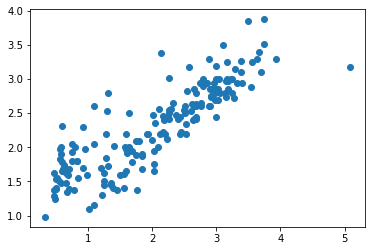

In [31]:
plt.scatter(df_indep['flavanoids'], df_indep['total_phenols'])

##### 6.5 Multidimensional scaling

Normalising features:

In [32]:
scaler = StandardScaler()
X_np = scaler.fit_transform(df_indep)

X_df = pd.DataFrame(X_np, columns=df_indep.columns.to_list())
X_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Multidimensional scaling projection

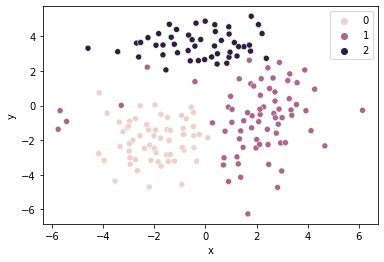

In [33]:
from sklearn.manifold import MDS
    
embedding = MDS(n_components=2)

target_sorted = df['target'].sort_values()
X_ = embedding.fit_transform(X_df)
df_mds = pd.DataFrame({'x': X_[:, 0], 'y': X_[:, 1],
                              'target': target_sorted})

sns.scatterplot(x='x', y='y', hue='target', data=df_mds)
plt.legend()
